In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_excel(r'C:\Users\Om Prakash Yadav\OneDrive\Desktop\seattle-weather.xlsx')

In [3]:
# Display data
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
# Display top 10 rows from dataset
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [5]:
# Display last 10 rows from dataset
data.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,2015-12-22,4.6,7.8,2.8,5.0,rain
1452,2015-12-23,6.1,5.0,2.8,7.6,rain
1453,2015-12-24,2.5,5.6,2.2,4.3,rain
1454,2015-12-25,5.8,5.0,2.2,1.5,rain
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [6]:
# Display Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [7]:
# gives statistical summary of dataset
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
# Returns tuple of shape (Rows, columns) of dataset
print("df.shape -->", data.shape)
print("Rows     -->", data.shape[0])
print("Columns  -->", data.shape[1])

df.shape --> (1461, 6)
Rows     --> 1461
Columns  --> 6


In [9]:
# returns names of columns in dataset
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [10]:
# returns dataype of each column
data.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [11]:
#returns the index information
data.index

RangeIndex(start=0, stop=1461, step=1)

In [12]:
# returns transpose of dataset
data.T

,0,1,2,3,4,5,6,7,8,9,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
date,2012-01-01 00:00:00,2012-01-02 00:00:00,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-07 00:00:00,2012-01-08 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,...,2015-12-22 00:00:00,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-25 00:00:00,2015-12-26 00:00:00,2015-12-27 00:00:00,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00
precipitation,0.0,10.9,0.8,20.3,1.3,2.5,0.0,0.0,4.3,1.0,...,4.6,6.1,2.5,5.8,0.0,8.6,1.5,0.0,0.0,0.0
temp_max,12.8,10.6,11.7,12.2,8.9,4.4,7.2,10.0,9.4,6.1,...,7.8,5.0,5.6,5.0,4.4,4.4,5.0,7.2,5.6,5.6
temp_min,5.0,2.8,7.2,5.6,2.8,2.2,2.8,2.8,5.0,0.6,...,2.8,2.8,2.2,2.2,0.0,1.7,1.7,0.6,-1.0,-2.1
wind,4.7,4.5,2.3,4.7,6.1,2.2,2.3,2.0,3.4,3.4,...,5.0,7.6,4.3,1.5,2.5,2.9,1.3,2.6,3.4,3.5
weather,drizzle,rain,rain,rain,rain,rain,rain,sun,rain,rain,...,rain,rain,rain,rain,sun,rain,rain,fog,sun,sun


In [13]:
# access a group of rows and columns by label
print (data.loc[:, ['precipitation','temp_max','temp_min']].head())
print (data.loc[10: , ['precipitation','temp_max','temp_min']])
print (data.loc[10:100 , ['precipitation','temp_max','temp_min','wind']])

   precipitation  temp_max  temp_min
0            0.0      12.8       5.0
1           10.9      10.6       2.8
2            0.8      11.7       7.2
3           20.3      12.2       5.6
4            1.3       8.9       2.8
      precipitation  temp_max  temp_min
10              0.0       6.1      -1.1
11              0.0       6.1      -1.7
12              0.0       5.0      -2.8
13              4.1       4.4       0.6
14              5.3       1.1      -3.3
...             ...       ...       ...
1456            8.6       4.4       1.7
1457            1.5       5.0       1.7
1458            0.0       7.2       0.6
1459            0.0       5.6      -1.0
1460            0.0       5.6      -2.1

[1451 rows x 3 columns]
     precipitation  temp_max  temp_min  wind
10             0.0       6.1      -1.1   5.1
11             0.0       6.1      -1.7   1.9
12             0.0       5.0      -2.8   1.3
13             4.1       4.4       0.6   5.3
14             5.3       1.1      -3.3   3.2
.. 

In [14]:
# extract rows from dataset with index position
print (data.iloc[0:10, :2])
print (data.iloc[10:100, :-1])
print (data.iloc[20:30, 2:4])

        date  precipitation
0 2012-01-01            0.0
1 2012-01-02           10.9
2 2012-01-03            0.8
3 2012-01-04           20.3
4 2012-01-05            1.3
5 2012-01-06            2.5
6 2012-01-07            0.0
7 2012-01-08            0.0
8 2012-01-09            4.3
9 2012-01-10            1.0
         date  precipitation  temp_max  temp_min  wind
10 2012-01-11            0.0       6.1      -1.1   5.1
11 2012-01-12            0.0       6.1      -1.7   1.9
12 2012-01-13            0.0       5.0      -2.8   1.3
13 2012-01-14            4.1       4.4       0.6   5.3
14 2012-01-15            5.3       1.1      -3.3   3.2
..        ...            ...       ...       ...   ...
95 2012-04-05            4.6       9.4       2.8   1.8
96 2012-04-06            0.3      11.1       3.3   2.6
97 2012-04-07            0.0      16.1       1.7   4.3
98 2012-04-08            0.0      21.1       7.2   4.1
99 2012-04-09            0.0      20.0       6.1   2.1

[90 rows x 5 columns]
    temp_

In [15]:
#  get the unique values of a column and their length
print (data['precipitation'].unique())
print ("Length --->",len(data['precipitation'].unique()),"\n")

print (data['temp_max'].unique())
print ("Length --->",len(data['temp_max'].unique()),"\n")

print (data['temp_min'].unique())
print ("Length --->",len(data['temp_min'].unique()),"\n")

print (data['wind'].unique())
print ("Length --->",len(data['wind'].unique()),"\n")

print (data['weather'].unique())
print ("Length --->",len(data['weather'].unique()))

[ 0.  10.9  0.8 20.3  1.3  2.5  4.3  1.   4.1  5.3  8.1 19.8 15.2 13.5
  3.   6.1  8.6  4.8 27.7  3.6  1.8  0.3  2.8 11.4 17.3  6.4  2.   6.9
  0.5 10.4 13.7 19.3  9.4 23.9  8.4 27.4  5.6 13.2  1.5  4.6  2.3  6.6
 10.7  3.8 18.5 14.  16.  16.5 15.7  5.8  7.9 20.8  8.9  7.1 23.1 34.5
 14.5  9.7 54.1 11.2 32.  35.6 19.6 13.  14.2 22.6  3.3 16.3 38.4  5.1
 11.9  7.4 11.7  9.9 12.7 39.1 20.6 21.3 43.4 16.8  9.1 30.  26.2 12.2
 21.6 18.3 17.  26.4 19.1 46.7 32.3 18.8 22.1 12.4 33.3  7.6 15.  25.4
 34.3 10.2 23.6 55.9 30.5 32.5 28.7 33.  33.5 47.2 22.4 29.5 21.8]
Length ---> 111 

[12.8 10.6 11.7 12.2  8.9  4.4  7.2 10.   9.4  6.1  5.   1.1  1.7  3.3
  0.  -1.1  8.3  6.7 14.4 15.6 13.9 16.1 11.1  7.8  5.6 15.  13.3 16.7
 21.1 20.  17.8 23.3 21.7 23.9 18.3 24.4 25.6 26.7 19.4 17.2 22.2 18.9
 22.8 20.6 25.  28.3 27.8 26.1 27.2 33.9 30.6 28.9 31.1 34.4 32.8 32.2
  3.9  2.8  2.2 30.  31.7 -0.5 -1.6 29.4 35.6 33.3 35. ]
Length ---> 67 

[ 5.   2.8  7.2  5.6  2.2  0.6 -1.1 -1.7 -2.8 -3.3  0.   3.3

In [16]:
# drop duplicates
print("data.shape      -->", data.shape , "Before")

temp_data = data.drop_duplicates()

print("temp_data.shape -->",temp_data.shape, " After droping duplicates")

data.shape      --> (1461, 6) Before
temp_data.shape --> (1461, 6)  After droping duplicates


In [17]:
# check null values in dataset
data.apply(pd.isnull)

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [18]:
# find total number of null values in each column
data.apply(pd.isnull).sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [19]:
# return a Series containing counts of unique values from a column
data['precipitation'].value_counts()

0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: precipitation, Length: 111, dtype: int64

In [20]:
# converts the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

In [21]:
# generate random row or column from dataset
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
566,2013-07-20,0.0,25.0,13.3,2.0,sun
906,2014-06-25,0.0,26.1,13.9,2.4,sun
1338,2015-08-31,0.0,18.9,16.1,5.8,sun
1079,2014-12-15,0.0,12.2,6.7,5.9,sun
366,2013-01-01,0.0,5.0,-2.8,2.7,sun
1037,2014-11-03,10.9,13.9,11.1,4.8,rain
1385,2015-10-17,0.3,19.4,11.7,1.3,rain
516,2013-05-31,0.0,19.4,11.1,2.5,sun
1353,2015-09-15,0.0,17.8,10.0,2.8,sun
1286,2015-07-10,0.0,21.1,16.7,3.7,sun


In [22]:
# returns a Series with a number of distinct observations over the requested axis
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [23]:
# # return a Series containing counts of unique values from a column
data['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [24]:
# calculate mean of numeric data
numeric_data = data.select_dtypes(include='number')
numeric_data.mean()

precipitation     3.029432
temp_max         16.439083
temp_min          8.234771
wind              3.241136
dtype: float64

In [25]:
# calculate median of numeric data
numeric_data.median()

precipitation     0.0
temp_max         15.6
temp_min          8.3
wind              3.0
dtype: float64

In [26]:
# calculate variance of numeric data
numeric_data.var()

precipitation    44.624996
temp_max         54.018944
temp_min         25.230571
wind              2.067341
dtype: float64

In [27]:
# calculate standard deviation of numeric data
numeric_data.std()

precipitation    6.680194
temp_max         7.349758
temp_min         5.023004
wind             1.437825
dtype: float64

In [28]:
# calculate correlation of numeric data
numeric_data.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [29]:
# get the mean values of columns in the dataset, grouped by different weather conditions
data.drop('date', axis=1).groupby('weather').mean()

,precipitation,temp_max,temp_min,wind
weather,,,,
drizzle,0.000000,15.926415,7.111321,2.367925
fog,0.000000,16.757426,7.979208,2.481188
rain,6.557878,13.454602,7.588768,3.669891
snow,8.553846,5.573077,0.146154,4.411538
sun,0.000000,19.861875,9.343750,2.956406


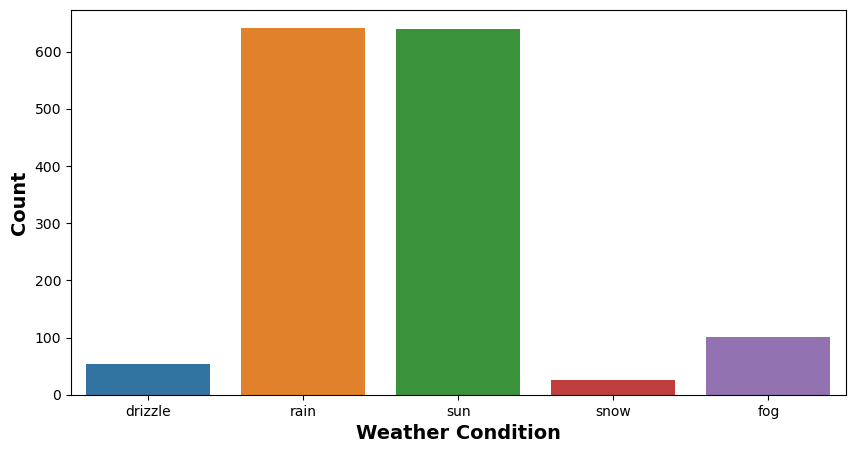

In [30]:
# Count Plot
plt.figure(figsize=(10,5))
sns.countplot(x = 'weather',data = data)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

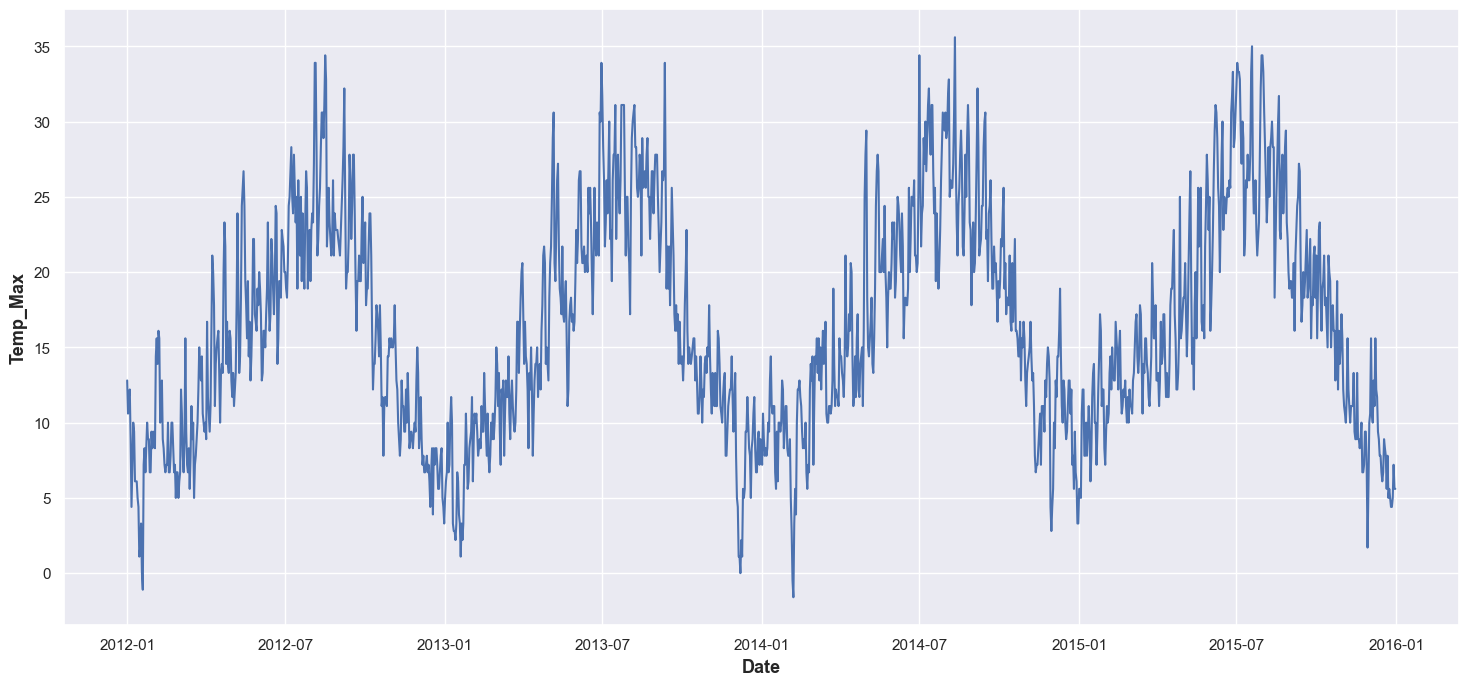

In [31]:
# Line Plot
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

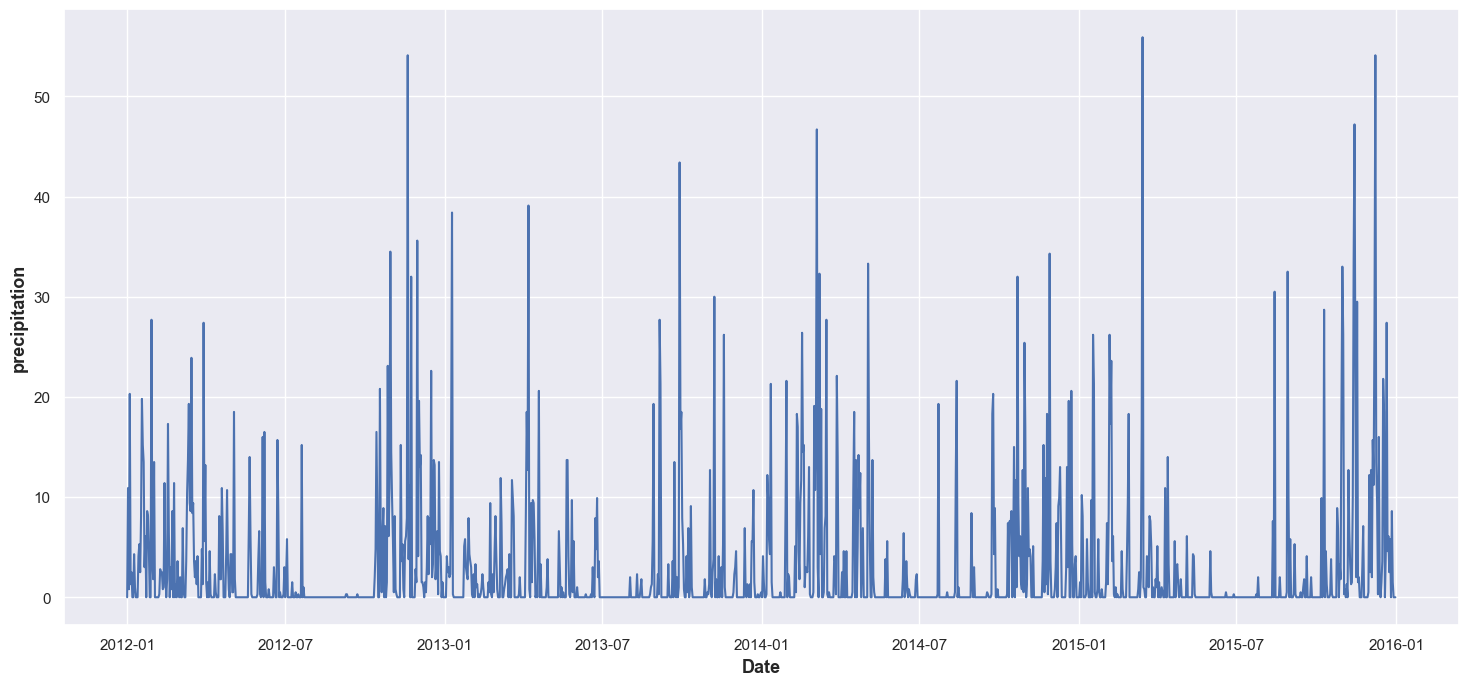

In [32]:
# Line Plot
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='precipitation',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("precipitation",fontweight='bold',size=13)
plt.show()

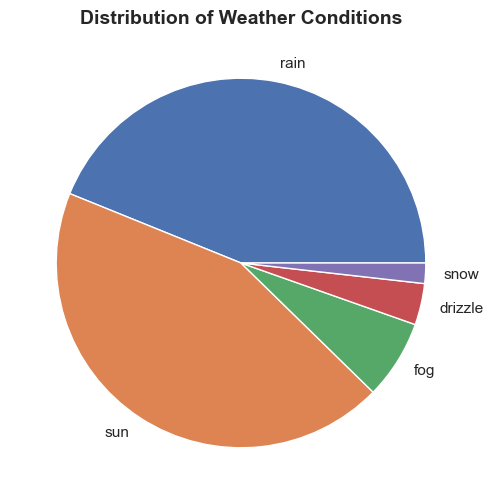

In [33]:
# Pie Plot
plt.figure(figsize=(8, 6))
data['weather'].value_counts().plot(kind='pie')
plt.title('Distribution of Weather Conditions', fontweight='bold', size=14)
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

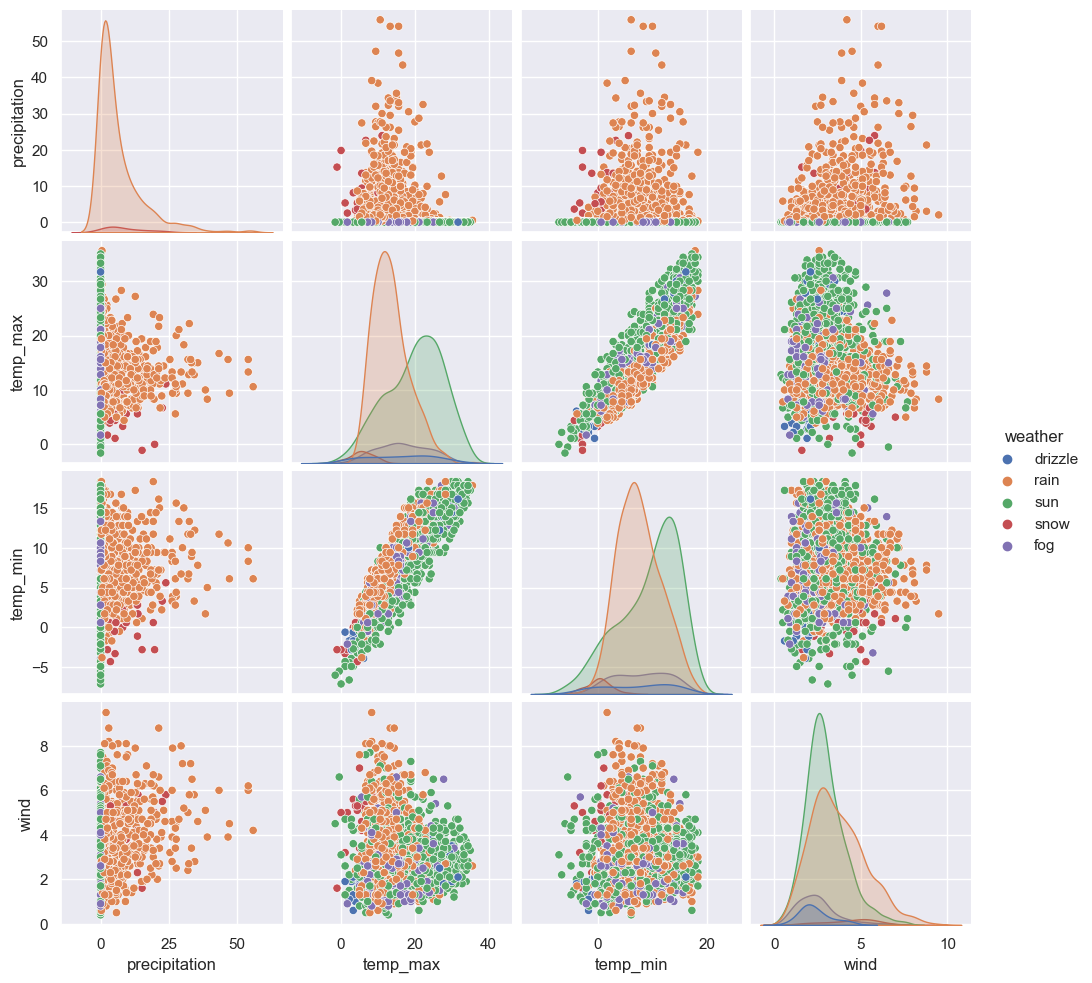

In [34]:
# Pair plot
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather')
plt.show()

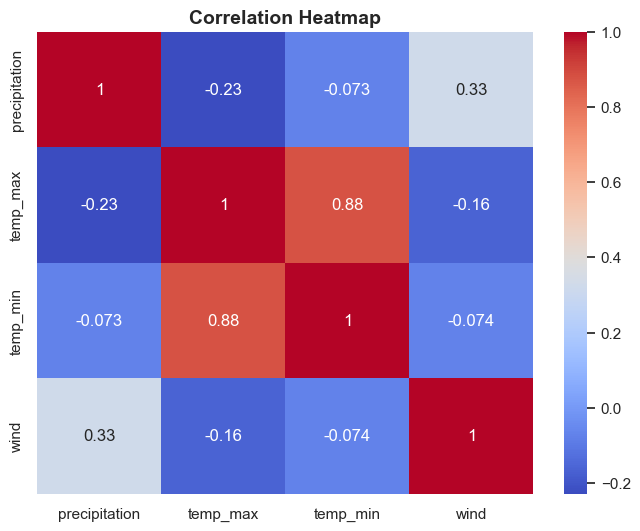

In [35]:
# Heatmap
# Selecting only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap', fontweight='bold', size=14)
plt.show()

In [36]:
# dictionary to convert the categorical values of the 'weather' column into corresponding numerical representations
classes={'drizzle':0,'fog':1,'rain':2,'snow':3,'sun':4}

In [37]:
# Drop 'date' column
dataset=data.drop('date', axis=1)

In [38]:
# converting the 'weather' column in the dataset from categorical data into numerical codes
dataset['weather']=dataset['weather'].astype('category')
dataset['weather']=dataset['weather'].cat.codes

In [39]:
dataset

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


# Test Size = 0.25

In [40]:
# x contains all the independent variables from the original dataset except for the 'weather' column.
# y contains the target variable or labels, which are the numerical codes representing different weather conditions.

x = dataset.drop('weather',axis=1)
y = dataset['weather']
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [41]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int8

In [42]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [43]:
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)

Shape of x training data :  (1095, 4)
Shape of y training data :  (1095,)
****************************************
Shape of x testing data :  (366, 4)
Shape of y testing data :  (366,)


In [44]:
# standardize the data
sc = StandardScaler()

#fit the scaler to the training data and then transform both the training and testing data
x_train = sc.fit_transform(x_train)     
x_test = sc.transform(x_test)

In [45]:
# to create and train a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train,y_train)

GaussianNB()

In [46]:
# to create and train a support vector machine classifier.
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [47]:
# to create and train a Random Forest classifier.
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [48]:
# to create and train a Decision Tree classifier.
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [49]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
# to create and train a XGBoost classifier.
from xgboost.sklearn import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
# Classifier List
classifier_list=[classifier_gnb,classifier_svc,classifier_dtc,classifier_rfc,classifier_xgb]

In [52]:
# takes test data (X_test, Y_test) and a classifier as input and computes the accuracy of 
# the classifier on this test data
def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [53]:
accuracy_list=[]
classifier_list_str=[]

In [54]:
# evaluating each classifier's accuracy on the test data (x_test and y_test) using the accuracy() function
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])   


classifier
GaussianNB()

83.60655737704919
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        30
           2       0.97      0.91      0.94       161
           3       0.50      0.50      0.50         8
           4       0.75      0.99      0.86       156

    accuracy                           0.84       366
   macro avg       0.45      0.48      0.46       366
weighted avg       0.76      0.84      0.79       366


Confusion Matrix
[[  0   0   0   0  11]
 [  0   0   0   0  30]
 [  0   0 147   4  10]
 [  0   0   4   4   0]
 [  1   0   0   0 155]]


classifier
SVC(kernel='linear', random_state=42)

78.14207650273224
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

In [55]:
accuracy_list

[83.60655737704919,
 78.14207650273224,
 71.31147540983606,
 78.41530054644808,
 79.78142076502732]

In [56]:
classifier_list_str

['Gaussi', 'SVC(ke', 'Decisi', 'Random', 'XGBCla']

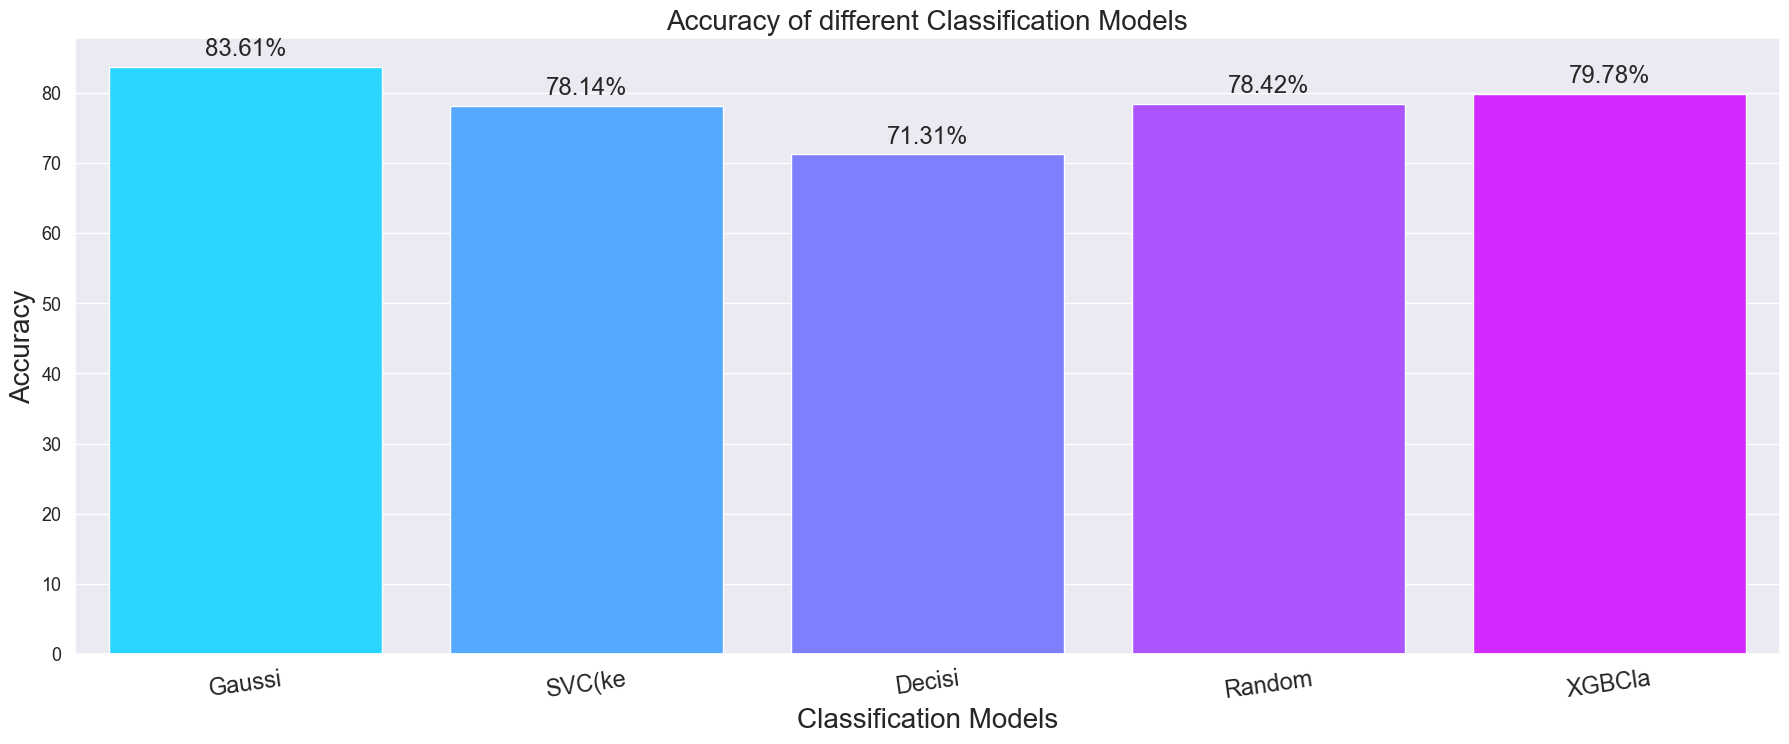

In [57]:
# creating a bar plot to visualize and compare the accuracies of different classification models
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5, palette="cool")
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 17, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [58]:
# evaluating classification models using various metrics 
#such as accuracy, precision, recall, and F1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for clf in classifier_list:
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')        
    f1 = f1_score(y_test, y_pred, average='weighted')                
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Printing the scores for each classifier
for i, clf in enumerate(classifier_list_str):
    print(f"Classifier: {clf}")
    print(f"Accuracy: {accuracy_list[i]:.4f}, Precision: {precision_list[i]:.4f}, Recall: {recall_list[i]:.4f}, F1 Score: {f1_list[i]:.4f}")
    print("------------------------")


Classifier: Gaussi
Accuracy: 0.8361, Precision: 0.7599, Recall: 0.8361, F1 Score: 0.7904
------------------------
Classifier: SVC(ke
Accuracy: 0.7814, Precision: 0.7078, Recall: 0.7814, F1 Score: 0.7292
------------------------
Classifier: Decisi
Accuracy: 0.7131, Precision: 0.7386, Recall: 0.7131, F1 Score: 0.7247
------------------------
Classifier: Random
Accuracy: 0.7842, Precision: 0.7580, Recall: 0.7842, F1 Score: 0.7663
------------------------
Classifier: XGBCla
Accuracy: 0.7978, Precision: 0.7693, Recall: 0.7978, F1 Score: 0.7781
------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


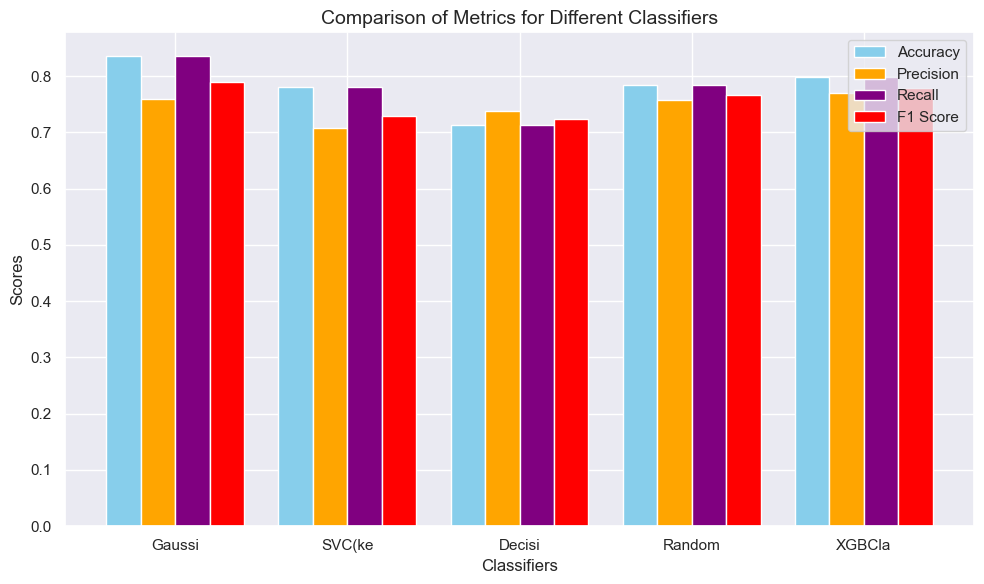

In [59]:
# Creating a list of classifiers for x-axis labels
classifiers = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Classifier 4', 'Classifier 5']

# Plotting the metrics for each classifier
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracy_list, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precision_list, bar_width, label='Precision', color='orange')
plt.bar(index + 2 * bar_width, recall_list, bar_width, label='Recall', color='purple')
plt.bar(index + 3 * bar_width, f1_list, bar_width, label='F1 Score', color='red')

plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Metrics for Different Classifiers', fontsize=14)
plt.xticks(index + bar_width * 1.5, classifier_list_str)
plt.legend()
plt.tight_layout()

plt.show()


# Test Size = 0.45

In [60]:
# x contains all the independent variables from the original dataset except for the 'weather' column.
# y contains the target variable or labels, which are the numerical codes representing different weather conditions.

x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [61]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.45, random_state =42)

In [62]:
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)

Shape of x training data :  (803, 4)
Shape of y training data :  (803,)
****************************************
Shape of x testing data :  (658, 4)
Shape of y testing data :  (658,)


In [63]:
sc = StandardScaler()               
# standardize the data
#fit the scaler to the training data and then transform both the training and testing data
x_train = sc.fit_transform(x_train)    
x_test = sc.transform(x_test)

In [64]:
# to create and train a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train,y_train)

GaussianNB()

In [65]:
# to create and train a Support Vector Machine classifier
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [66]:
# to create and train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
# to create and train a  Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [68]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [69]:
# to create and train a XGBclassifier
from xgboost.sklearn import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [70]:
classifier_list=[classifier_gnb,classifier_svc,classifier_dtc,classifier_rfc,classifier_xgb]

In [71]:
# takes in the test data (X_test, Y_test) and a classifier as input and 
#computes the accuracy of the classifier on this test data
def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [72]:
accuracy_list=[]
classifier_list_str=[]

In [74]:
# evaluating each classifier's accuracy on the test data (x_test and y_test) using the accuracy() function
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])   


classifier
GaussianNB()

83.58662613981764
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.20      0.05      0.08        21
           1       0.00      0.00      0.00        53
           2       0.99      0.91      0.94       295
           3       0.62      0.67      0.64        12
           4       0.74      0.99      0.85       277

    accuracy                           0.84       658
   macro avg       0.51      0.52      0.50       658
weighted avg       0.77      0.84      0.79       658


Confusion Matrix
[[  1   0   0   0  20]
 [  1   0   0   0  52]
 [  0   0 267   5  23]
 [  0   0   4   8   0]
 [  3   0   0   0 274]]


classifier
SVC(kernel='linear', random_state=42)

77.96352583586626
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

In [75]:
accuracy_list

[83.58662613981764,
 77.96352583586626,
 76.89969604863222,
 81.30699088145896,
 81.30699088145896]

In [76]:
classifier_list_str

['Gaussi', 'SVC(ke', 'Decisi', 'Random', 'XGBCla']

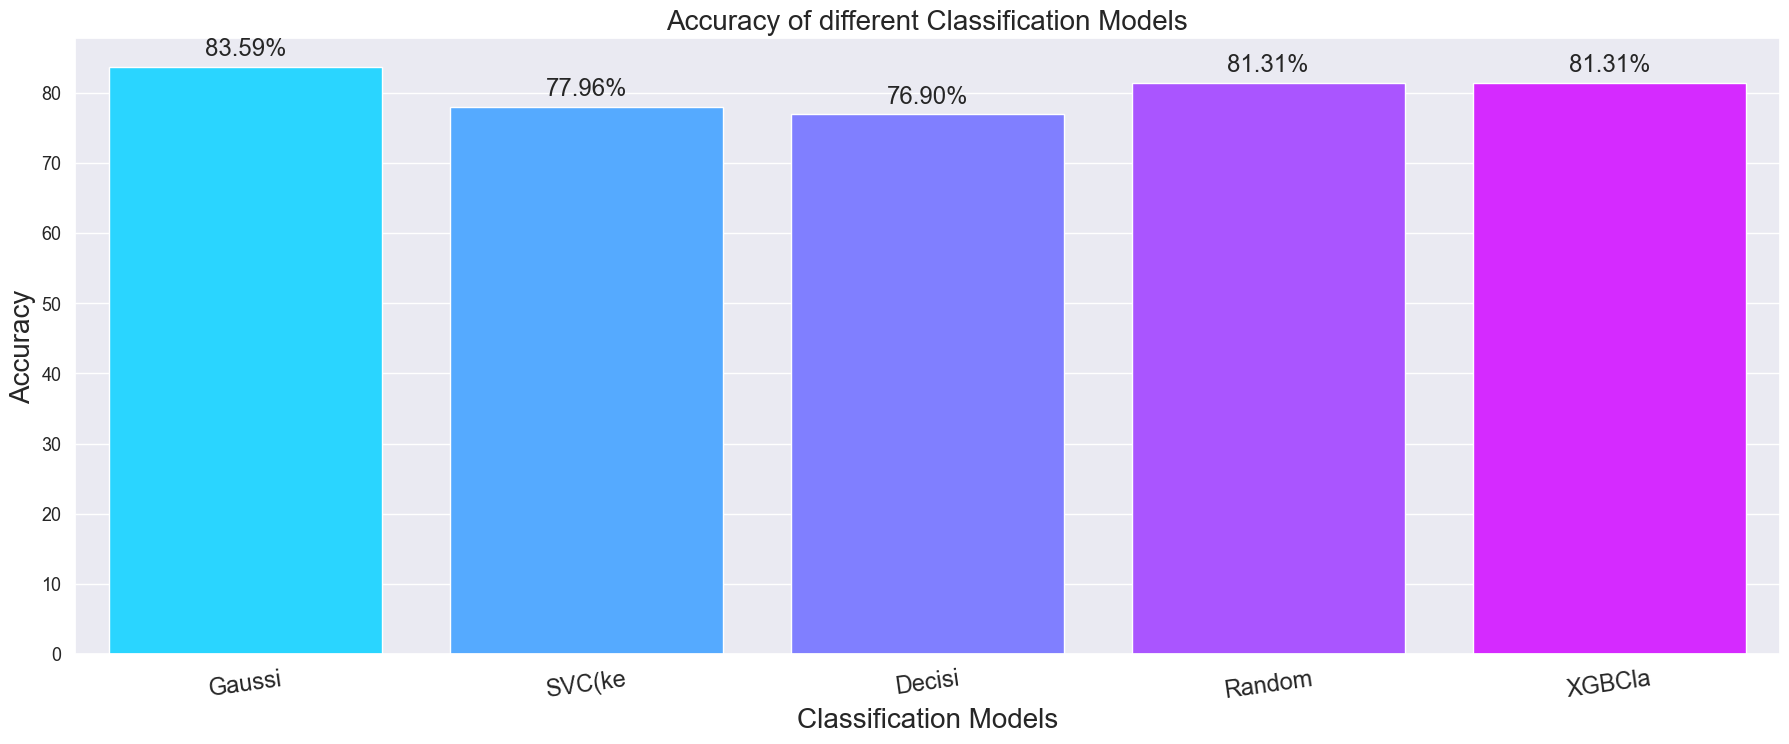

In [77]:
# creating a bar plot to visualize and compare the accuracies of different classification models
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5, palette="cool")
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 17, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [78]:
# evaluating classification models using various metrics such as accuracy, precision, recall, and F1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for clf in classifier_list:
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' takes care of multiclass scenarios
    recall = recall_score(y_test, y_pred, average='weighted')        # 'weighted' takes care of multiclass scenarios
    f1 = f1_score(y_test, y_pred, average='weighted')                # 'weighted' takes care of multiclass scenarios
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Printing the scores for each classifier
for i, clf in enumerate(classifier_list_str):
    print(f"Classifier: {clf}")
    print(f"Accuracy: {accuracy_list[i]:.4f}, Precision: {precision_list[i]:.4f}, Recall: {recall_list[i]:.4f}, F1 Score: {f1_list[i]:.4f}")
    print("------------------------")


Classifier: Gaussi
Accuracy: 0.8359, Precision: 0.7719, Recall: 0.8359, F1 Score: 0.7942
------------------------
Classifier: SVC(ke
Accuracy: 0.7796, Precision: 0.7313, Recall: 0.7796, F1 Score: 0.7315
------------------------
Classifier: Decisi
Accuracy: 0.7690, Precision: 0.7657, Recall: 0.7690, F1 Score: 0.7666
------------------------
Classifier: Random
Accuracy: 0.8131, Precision: 0.7897, Recall: 0.8131, F1 Score: 0.7955
------------------------
Classifier: XGBCla
Accuracy: 0.8131, Precision: 0.7872, Recall: 0.8131, F1 Score: 0.7944
------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


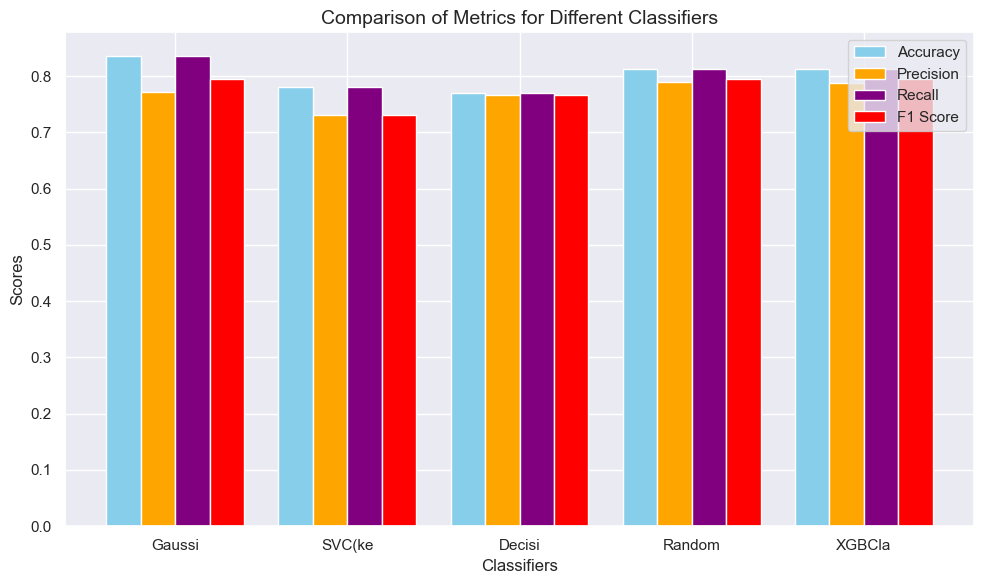

In [79]:
# Creating a list of classifiers for x-axis labels
classifiers = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Classifier 4', 'Classifier 5']

# Plotting the metrics for each classifier
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracy_list, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precision_list, bar_width, label='Precision', color='orange')
plt.bar(index + 2 * bar_width, recall_list, bar_width, label='Recall', color='purple')
plt.bar(index + 3 * bar_width, f1_list, bar_width, label='F1 Score', color='red')

plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Metrics for Different Classifiers', fontsize=14)
plt.xticks(index + bar_width * 1.5, classifier_list_str)
plt.legend()
plt.tight_layout()

plt.show()


# Test Size = 0.60

In [80]:
# x contains all the independent variables from the original dataset except for the 'weather' column.
# y contains the target variable or labels, which are the numerical codes representing different weather conditions.

x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [81]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.60, random_state =42)

In [82]:
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)

Shape of x training data :  (584, 4)
Shape of y training data :  (584,)
****************************************
Shape of x testing data :  (877, 4)
Shape of y testing data :  (877,)


In [83]:
 # standardize the data
sc = StandardScaler()  
#fit the scaler to the training data and then transform both the training and testing data
x_train = sc.fit_transform(x_train)     
x_test = sc.transform(x_test)

In [84]:
# to create and train a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train,y_train)

GaussianNB()

In [85]:
# to create and train a Support Vector Machine classifier
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [86]:
# to create and train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [87]:
# to create and train a  Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [88]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [89]:
# to create and train a XGBclassifier
from xgboost.sklearn import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [90]:
classifier_list=[classifier_gnb,classifier_svc,classifier_dtc,classifier_rfc,classifier_xgb]

In [91]:
# takes in the test data (X_test, Y_test) and a classifier as input 
#and computes the accuracy of the classifier on this test data
def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [92]:
accuracy_list=[]
classifier_list_str=[]

In [93]:
# evaluating each classifier's accuracy on the test data (x_test and y_test) using the accuracy() function
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])   


classifier
GaussianNB()

83.58038768529077
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.36      0.19      0.25        26
           1       0.00      0.00      0.00        63
           2       0.98      0.89      0.93       385
           3       0.47      0.60      0.53        15
           4       0.77      0.97      0.86       388

    accuracy                           0.84       877
   macro avg       0.52      0.53      0.51       877
weighted avg       0.79      0.84      0.81       877


Confusion Matrix
[[  5   0   0   0  21]
 [  1   0   0   0  62]
 [  0   0 343  10  32]
 [  0   0   6   9   0]
 [  8   4   0   0 376]]


classifier
SVC(kernel='linear', random_state=42)

79.01938426453819
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
accuracy_list

[83.58038768529077,
 79.01938426453819,
 76.05473204104904,
 81.29988597491447,
 82.55416191562144]

In [95]:
classifier_list_str

['Gaussi', 'SVC(ke', 'Decisi', 'Random', 'XGBCla']

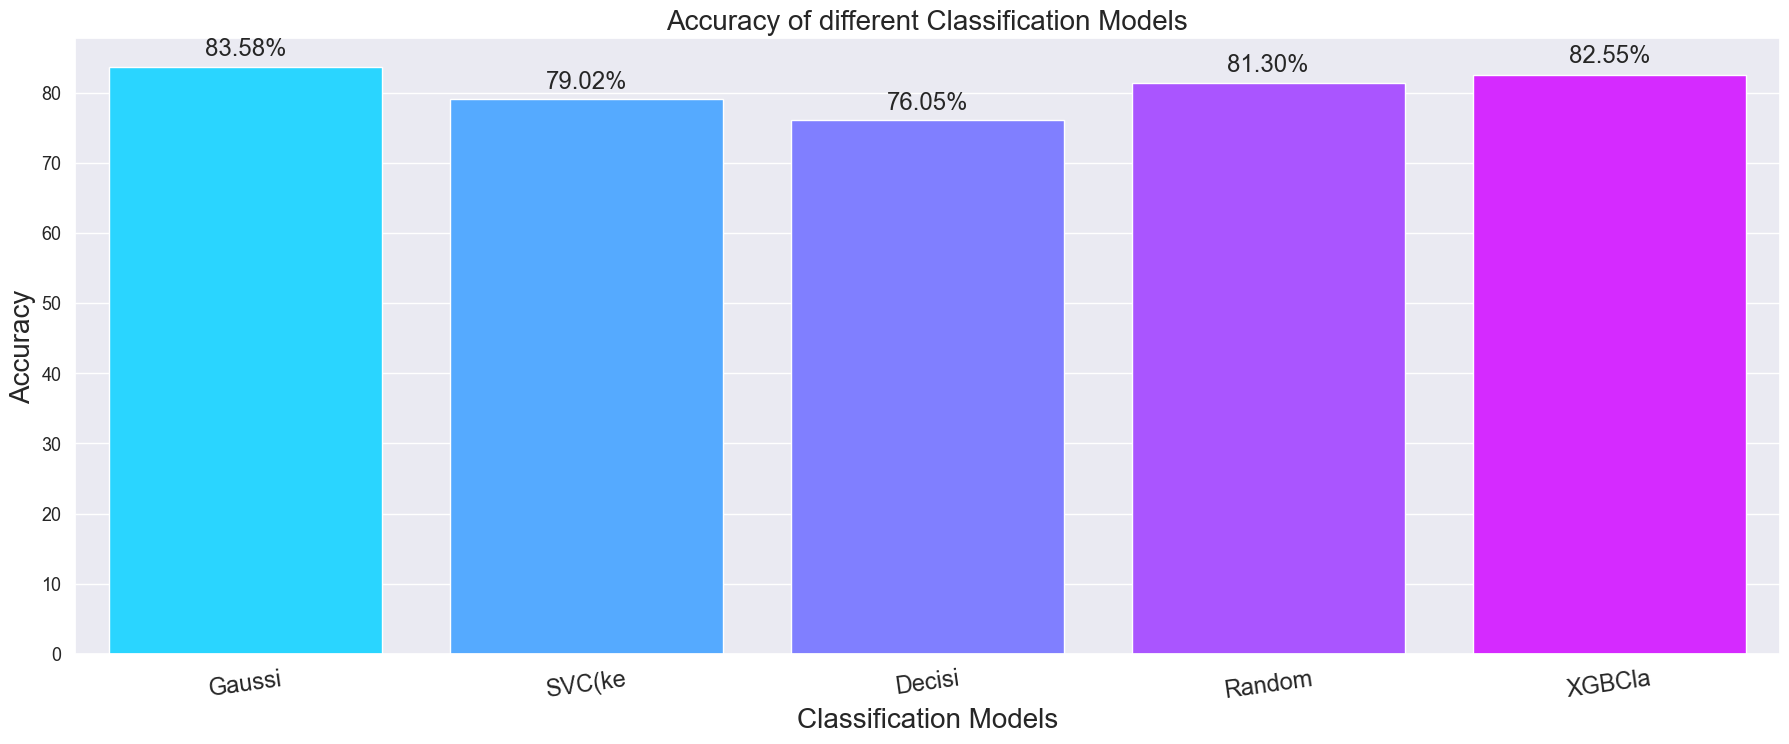

In [96]:
# creating a bar plot to visualize and compare the accuracies of different classification models
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5, palette="cool")
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 17, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [97]:
# evaluating classification models using various metrics such as accuracy, precision, recall, and F1 score on the test set (x_test, y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for clf in classifier_list:
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' takes care of multiclass scenarios
    recall = recall_score(y_test, y_pred, average='weighted')        # 'weighted' takes care of multiclass scenarios
    f1 = f1_score(y_test, y_pred, average='weighted')                # 'weighted' takes care of multiclass scenarios
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Printing the scores for each classifier
for i, clf in enumerate(classifier_list_str):
    print(f"Classifier: {clf}")
    print(f"Accuracy: {accuracy_list[i]:.4f}, Precision: {precision_list[i]:.4f}, Recall: {recall_list[i]:.4f}, F1 Score: {f1_list[i]:.4f}")
    print("------------------------")


Classifier: Gaussi
Accuracy: 0.8358, Precision: 0.7889, Recall: 0.8358, F1 Score: 0.8053
------------------------
Classifier: SVC(ke
Accuracy: 0.7902, Precision: 0.7457, Recall: 0.7902, F1 Score: 0.7453
------------------------
Classifier: Decisi
Accuracy: 0.7605, Precision: 0.7827, Recall: 0.7605, F1 Score: 0.7712
------------------------
Classifier: Random
Accuracy: 0.8130, Precision: 0.7930, Recall: 0.8130, F1 Score: 0.8006
------------------------
Classifier: XGBCla
Accuracy: 0.8255, Precision: 0.8089, Recall: 0.8255, F1 Score: 0.8138
------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


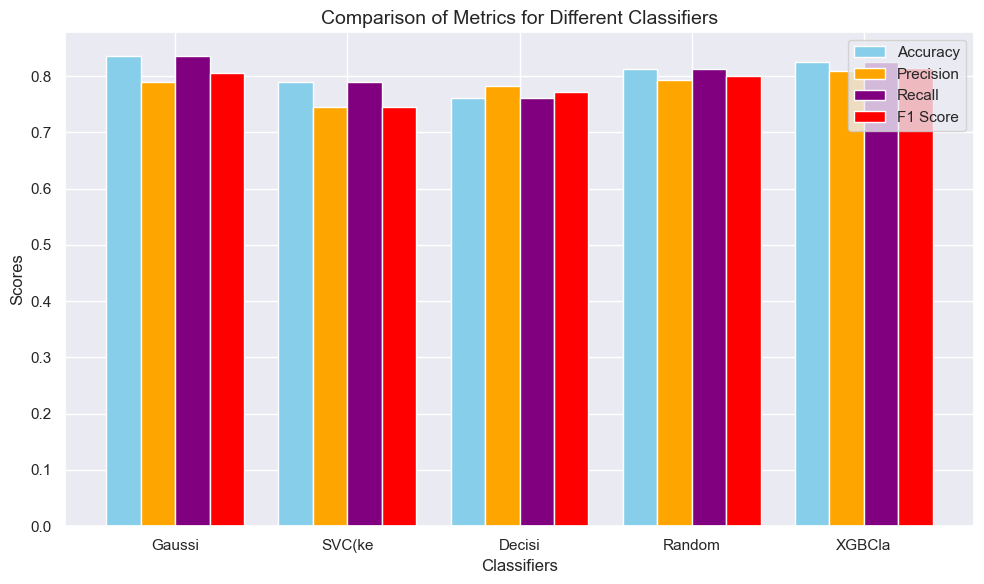

In [98]:
# Creating a list of classifiers for x-axis labels
classifiers = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Classifier 4', 'Classifier 5']

# Plotting the metrics for each classifier
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracy_list, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precision_list, bar_width, label='Precision', color='orange')
plt.bar(index + 2 * bar_width, recall_list, bar_width, label='Recall', color='purple')
plt.bar(index + 3 * bar_width, f1_list, bar_width, label='F1 Score', color='red')

plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Metrics for Different Classifiers', fontsize=14)
plt.xticks(index + bar_width * 1.5, classifier_list_str)
plt.legend()
plt.tight_layout()

plt.show()


# Test Size =0.80

In [99]:
# x contains all the independent variables from the original dataset except for the 'weather' column.
# y contains the target variable or labels, which are the numerical codes representing different weather conditions.

x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [100]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.80, random_state =42)

In [101]:
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)

Shape of x training data :  (292, 4)
Shape of y training data :  (292,)
****************************************
Shape of x testing data :  (1169, 4)
Shape of y testing data :  (1169,)


In [102]:
 # standardize the data
sc = StandardScaler()     
#fit the scaler to the training data and then transform both the training and testing data
x_train = sc.fit_transform(x_train)     
x_test = sc.transform(x_test)

In [103]:
# to create and train a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train,y_train)

GaussianNB()

In [104]:
# to create and train a Support Vector Machine classifier
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [105]:
# to create and train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [106]:
# to create and train a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [107]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [108]:
# to create and train a XGBclassifier
from xgboost.sklearn import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [109]:
classifier_list=[classifier_gnb,classifier_svc,classifier_dtc,classifier_rfc,classifier_xgb]

In [110]:
# takes in the test data (X_test, Y_test) and a classifier as input 
#and computes the accuracy of the classifier on this test data
def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [111]:
accuracy_list=[]
classifier_list_str=[]

In [112]:
# evaluating each classifier's accuracy on the test data (x_test and y_test) using the accuracy() function
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:13])   


classifier
GaussianNB()

83.23353293413174
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.35      0.20      0.25        35
           1       0.00      0.00      0.00        89
           2       0.96      0.90      0.93       507
           3       0.29      0.19      0.23        21
           4       0.76      0.98      0.86       517

    accuracy                           0.83      1169
   macro avg       0.47      0.45      0.45      1169
weighted avg       0.77      0.83      0.79      1169


Confusion Matrix
[[  7   0   0   0  28]
 [  1   0   0   0  88]
 [  0   0 457  10  40]
 [  0   0  17   4   0]
 [ 12   0   0   0 505]]


classifier
SVC(kernel='linear', random_state=42)

77.75876817792987
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

In [113]:
accuracy_list

[83.23353293413174,
 77.75876817792987,
 76.56116338751069,
 82.80581693755347,
 80.58169375534645]

In [114]:
classifier_list_str

['GaussianNB()',
 "SVC(kernel='l",
 'DecisionTreeC',
 'RandomForestC',
 'XGBClassifier']

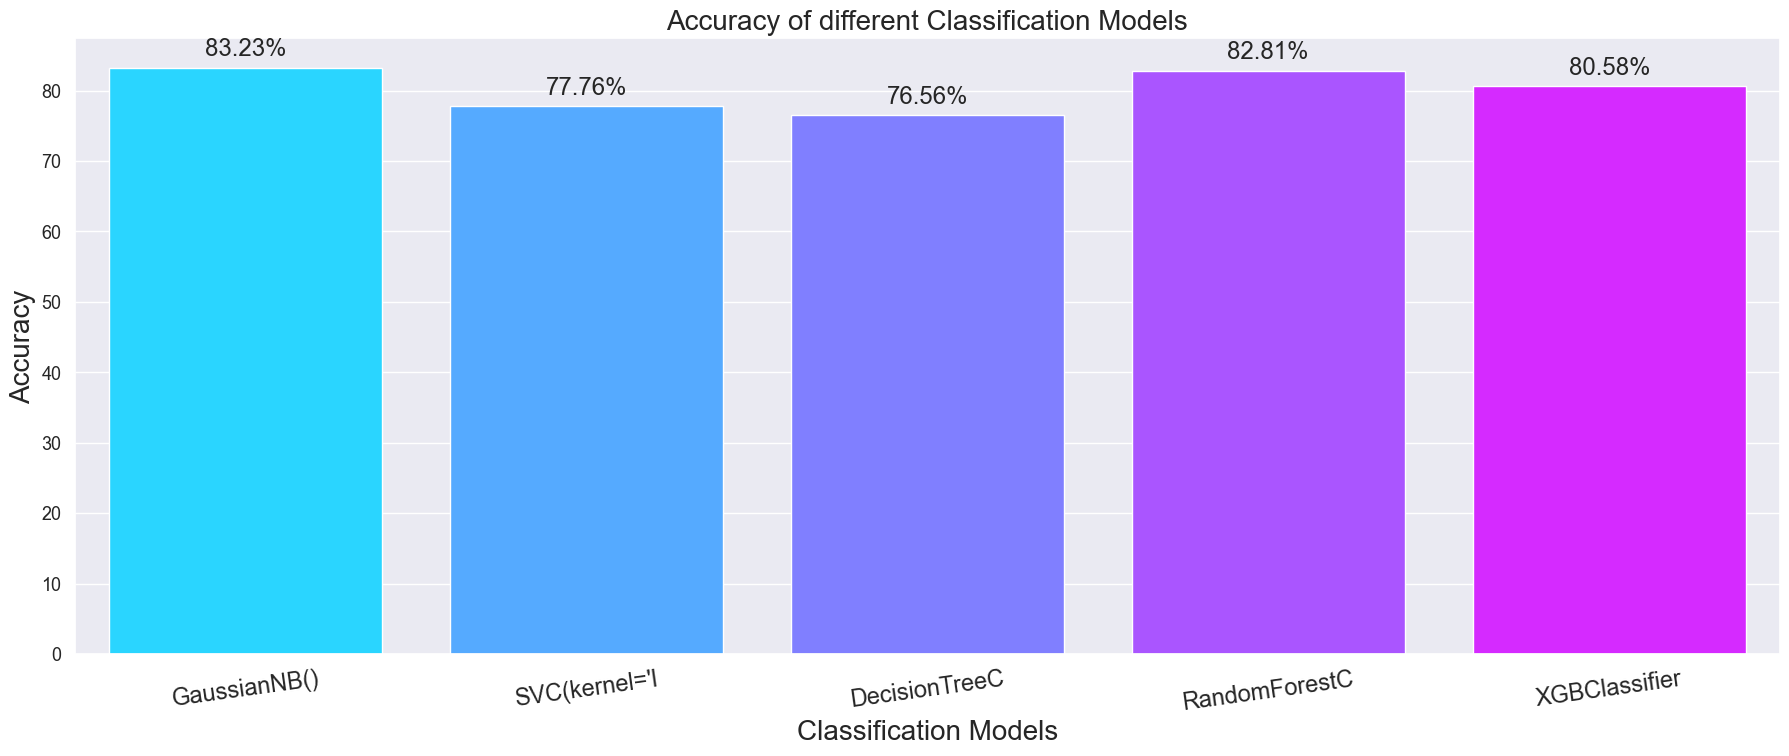

In [115]:
# creating a bar plot to visualize and compare the accuracies of different classification models
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation=1.5, palette="cool")
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 17, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [116]:
# evaluating classification models using various metrics such as accuracy, precision, recall, and F1 score on the test set (x_test, y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for clf in classifier_list:
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' takes care of multiclass scenarios
    recall = recall_score(y_test, y_pred, average='weighted')        # 'weighted' takes care of multiclass scenarios
    f1 = f1_score(y_test, y_pred, average='weighted')                # 'weighted' takes care of multiclass scenarios
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Printing the scores for each classifier
for i, clf in enumerate(classifier_list_str):
    print(f"Classifier: {clf}")
    print(f"Accuracy: {accuracy_list[i]:.4f}, Precision: {precision_list[i]:.4f}, Recall: {recall_list[i]:.4f}, F1 Score: {f1_list[i]:.4f}")
    print("------------------------")


Classifier: GaussianNB()
Accuracy: 0.8323, Precision: 0.7716, Recall: 0.8323, F1 Score: 0.7950
------------------------
Classifier: SVC(kernel='l
Accuracy: 0.7776, Precision: 0.7208, Recall: 0.7776, F1 Score: 0.7329
------------------------
Classifier: DecisionTreeC
Accuracy: 0.7656, Precision: 0.7903, Recall: 0.7656, F1 Score: 0.7760
------------------------
Classifier: RandomForestC
Accuracy: 0.8281, Precision: 0.8056, Recall: 0.8281, F1 Score: 0.8107
------------------------
Classifier: XGBClassifier
Accuracy: 0.8058, Precision: 0.7954, Recall: 0.8058, F1 Score: 0.7958
------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


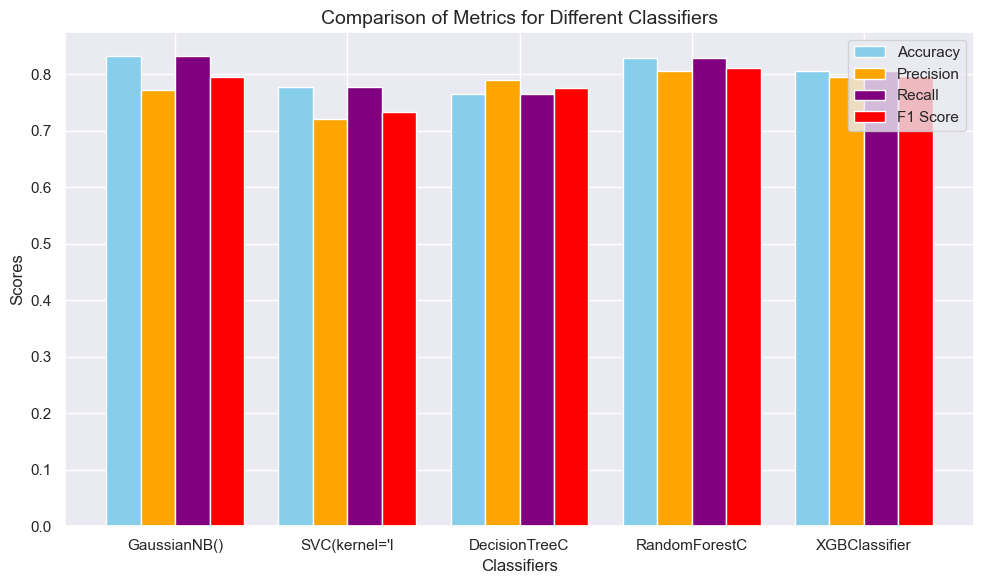

In [117]:
# Creating a list of classifiers for x-axis labels
classifiers = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Classifier 4', 'Classifier 5']

# Plotting the metrics for each classifier
bar_width = 0.2
index = np.arange(len(classifiers))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracy_list, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precision_list, bar_width, label='Precision', color='orange')
plt.bar(index + 2 * bar_width, recall_list, bar_width, label='Recall', color='purple')
plt.bar(index + 3 * bar_width, f1_list, bar_width, label='F1 Score', color='red')

plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Metrics for Different Classifiers', fontsize=14)
plt.xticks(index + bar_width * 1.5, classifier_list_str)
plt.legend()
plt.tight_layout()

plt.show()
